## Proyecto de Segunda Unidad 

Nombres: Jordan Espinosa - Hector Cedeño <br>
Fecha: 28/07/2022

## NAIVE BAYES

In [425]:
'''Se importa las pricipales libreías que se van a utilizar dentro de la programación'''
#Se importa la librería panda
import pandas as pd
##Se importa la librería numpy
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from hmmlearn import hmm
from fcmeans import FCM

In [426]:
'''Se encarga de leer y cargar el dataset que se esta utilizando de la detención del malware '''
#leemos el dataset 
df=pd.read_csv('dynamic_api_call_sequence_per_malware_100_0_306.csv')

In [427]:
#visualización de los 10 primeros datos
df.head(10)

,hash,t_0,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,...,t_91,t_92,t_93,t_94,t_95,t_96,t_97,t_98,t_99,malware
0,071e8c3f8922e186e57548cd4c703a5d,112,274,158,215,274,158,215,298,76,...,71,297,135,171,215,35,208,56,71,1
1,33f8e6d08a6aae939f25a8e0d63dd523,82,208,187,208,172,117,172,117,172,...,81,240,117,71,297,135,171,215,35,1
2,b68abd064e975e1c6d5f25e748663076,16,110,240,117,240,117,240,117,240,...,65,112,123,65,112,123,65,113,112,1
3,72049be7bd30ea61297ea624ae198067,82,208,187,208,172,117,172,117,172,...,208,302,208,302,187,208,302,228,302,1
4,c9b3700a77facf29172f32df6bc77f48,82,240,117,240,117,240,117,240,117,...,209,260,40,209,260,141,260,141,260,1
5,cc6217be863e606e49da90fee2252f52,117,208,117,208,117,240,117,240,117,...,141,65,260,141,65,9,117,260,65,1
6,f7a1a3c38809d807b3f5f4cc00b1e9b7,215,274,158,215,274,158,215,172,117,...,117,240,117,172,60,81,60,81,225,1
7,164b56522eb24164184460f8523ed7e2,82,240,117,240,117,240,117,240,117,...,35,172,117,275,240,80,60,215,35,1
8,56ae1459ba61a14eb119982d6ec793d7,82,240,117,240,117,240,117,240,117,...,117,16,31,215,108,208,80,240,117,1
9,c4148ca91c5246a8707a1ac1fd1e2e36,82,208,187,208,172,117,172,208,16,...,117,172,117,208,172,117,100,215,35,1


In [428]:
'''Muestra la descripción de cada uno de los campos del dataset con la función describe'''
#desplegar la descripción del dataset
df.describe()

,t_0,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,t_9,...,t_91,t_92,t_93,t_94,t_95,t_96,t_97,t_98,t_99,malware
count,43876.000000,43876.000000,43876.000000,43876.000000,43876.000000,43876.000000,43876.000000,43876.000000,43876.000000,43876.000000,...,43876.000000,43876.000000,43876.000000,43876.000000,43876.000000,43876.000000,43876.000000,43876.000000,43876.000000,43876.000000
mean,142.830226,211.477414,148.217294,189.045674,187.514746,174.190218,170.290022,199.070015,142.659016,167.358921,...,154.448332,173.219459,159.951568,164.615074,173.637159,152.397848,158.442543,160.717203,155.788199,0.975408
std,75.599441,60.082481,47.667868,68.119087,71.196556,65.713664,55.469501,65.474790,66.756934,53.440972,...,78.342789,82.696235,74.248027,70.240283,70.632812,79.819427,78.142193,74.979008,79.068212,0.154880
min,2.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,82.000000,172.000000,117.000000,117.000000,117.000000,117.000000,117.000000,159.000000,117.000000,117.000000,...,81.000000,117.000000,114.000000,117.000000,117.000000,89.000000,100.000000,108.000000,75.250000,1.000000
50%,82.000000,240.000000,158.000000,215.000000,172.000000,158.000000,172.000000,215.000000,117.000000,172.000000,...,141.000000,172.000000,141.000000,171.000000,172.000000,141.000000,171.000000,158.000000,141.000000,1.000000
75%,215.000000,240.000000,172.000000,240.000000,274.000000,240.000000,215.000000,240.000000,208.000000,208.000000,...,240.000000,260.000000,240.000000,215.000000,240.000000,215.000000,224.000000,226.000000,225.000000,1.000000
max,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,...,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,1.000000


In [429]:
df = df.drop('hash', axis = 1)

In [430]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43876 entries, 0 to 43875
Columns: 101 entries, t_0 to malware
dtypes: int64(101)
memory usage: 33.8 MB


In [431]:
print(df.nunique())

t_0         79
t_1         83
t_2         99
t_3         98
t_4        122
          ... 
t_96       187
t_97       188
t_98       187
t_99       180
malware      2
Length: 101, dtype: int64


In [432]:
print(df.isnull().sum())

t_0        0
t_1        0
t_2        0
t_3        0
t_4        0
          ..
t_96       0
t_97       0
t_98       0
t_99       0
malware    0
Length: 101, dtype: int64


### Normalizacion

In [433]:
# let's separate the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(df.drop('malware', axis=1),
                                                    df['malware'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((30713, 100), (13163, 100))

In [434]:
means = X_train.mean(axis=0)
means

t_0     142.636603
t_1     211.297105
t_2     148.337772
t_3     189.101130
t_4     187.488360
           ...    
t_95    173.930648
t_96    152.065379
t_97    158.741868
t_98    160.367922
t_99    155.642236
Length: 100, dtype: float64

In [435]:
ranges = X_train.max(axis=0)-X_train.min(axis=0)
ranges

t_0     304
t_1     304
t_2     304
t_3     298
t_4     306
       ... 
t_95    306
t_96    306
t_97    306
t_98    306
t_99    306
Length: 100, dtype: int64

In [436]:
X_train_scaled = (X_train - means) / ranges
X_test_scaled = (X_test - means) / ranges

In [437]:

np.round(X_train.describe(), 1)

,t_0,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,t_9,...,t_90,t_91,t_92,t_93,t_94,t_95,t_96,t_97,t_98,t_99
count,30713.0,30713.0,30713.0,30713.0,30713.0,30713.0,30713.0,30713.0,30713.0,30713.0,...,30713.0,30713.0,30713.0,30713.0,30713.0,30713.0,30713.0,30713.0,30713.0,30713.0
mean,142.6,211.3,148.3,189.1,187.5,174.1,170.3,198.9,142.6,167.4,...,158.6,154.8,173.1,160.4,164.3,173.9,152.1,158.7,160.4,155.6
std,75.5,60.2,47.7,68.1,71.2,65.8,55.6,65.6,66.9,53.5,...,79.7,78.6,82.6,74.3,70.1,70.6,79.8,78.3,75.0,79.2
min,2.0,2.0,2.0,8.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,82.0,172.0,117.0,117.0,117.0,117.0,117.0,158.0,117.0,117.0,...,117.0,81.0,117.0,114.0,117.0,117.0,89.0,100.0,108.0,71.0
50%,82.0,240.0,158.0,215.0,172.0,158.0,172.0,215.0,117.0,172.0,...,158.0,141.0,172.0,141.0,171.0,172.0,141.0,172.0,156.0,141.0
75%,215.0,240.0,172.0,240.0,274.0,240.0,215.0,240.0,208.0,208.0,...,240.0,240.0,260.0,240.0,215.0,240.0,215.0,224.0,225.0,225.0
max,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,...,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0


In [438]:

np.round(X_train_scaled.describe(), 1)

,t_0,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,t_9,...,t_90,t_91,t_92,t_93,t_94,t_95,t_96,t_97,t_98,t_99
count,30713.0,30713.0,30713.0,30713.0,30713.0,30713.0,30713.0,30713.0,30713.0,30713.0,...,30713.0,30713.0,30713.0,30713.0,30713.0,30713.0,30713.0,30713.0,30713.0,30713.0
mean,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,...,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0
std,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,...,0.3,0.3,0.3,0.2,0.2,0.2,0.3,0.3,0.2,0.3
min,-0.5,-0.7,-0.5,-0.6,-0.6,-0.6,-0.6,-0.6,-0.5,-0.5,...,-0.5,-0.5,-0.6,-0.5,-0.5,-0.6,-0.5,-0.5,-0.5,-0.5
25%,-0.2,-0.1,-0.1,-0.2,-0.2,-0.2,-0.2,-0.1,-0.1,-0.2,...,-0.1,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.3
50%,-0.2,0.1,0.0,0.1,-0.1,-0.1,0.0,0.1,-0.1,0.0,...,-0.0,-0.0,-0.0,-0.1,0.0,-0.0,-0.0,0.0,-0.0,-0.0
75%,0.2,0.1,0.1,0.2,0.3,0.2,0.1,0.1,0.2,0.1,...,0.3,0.3,0.3,0.3,0.2,0.2,0.2,0.2,0.2,0.2
max,0.5,0.3,0.5,0.4,0.4,0.4,0.4,0.4,0.5,0.5,...,0.5,0.5,0.4,0.5,0.5,0.4,0.5,0.5,0.5,0.5


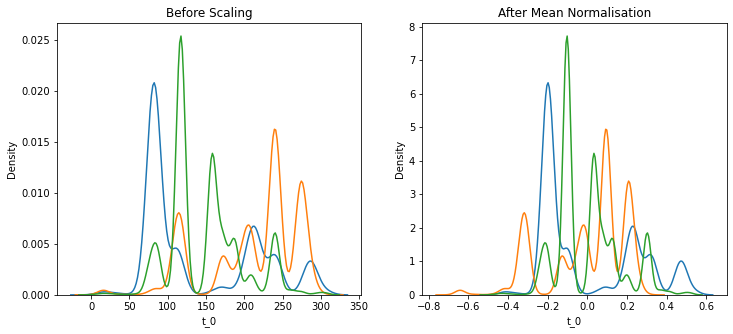

In [439]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['t_0'], ax=ax1)
sns.kdeplot(X_train['t_1'], ax=ax1)
sns.kdeplot(X_train['t_2'], ax=ax1)

# after scaling
ax2.set_title('After Mean Normalisation')
sns.kdeplot(X_train_scaled['t_0'], ax=ax2)
sns.kdeplot(X_train_scaled['t_1'], ax=ax2)
sns.kdeplot(X_train_scaled['t_2'], ax=ax2)
plt.show()

In [440]:
'''Se definen las variables objetivo y de entrada, en donde la variable de entrada posee las 100 columnas,
a excepción del hash debido a que es de tipo unico'''
#Transformación de las caracteristicas
# Variable objetivo
VariableObjetivo=['malware']
#variables de entrada
VariablesEntrada=['t_0', 't_1', 't_2', 't_3','t_4', 't_5', 't_6', 't_7', 't_8','t_9', 't_10', 't_11', 't_12', 't_13',
                  't_14', 't_15', 't_16', 't_17', 't_18','t_19', 't_20', 't_21', 't_22', 't_23','t_24', 't_25', 't_26', 't_27',
                  't_28','t_29', 't_30', 't_31', 't_32', 't_33','t_34', 't_35', 't_36', 't_37', 't_38','t_39', 't_40', 't_41',
                  't_42', 't_43','t_44', 't_45', 't_46', 't_47', 't_48','t_49', 't_50', 't_51', 't_52', 't_53','t_54', 't_55',
                  't_56', 't_57', 't_58','t_59', 't_60', 't_61', 't_62', 't_63','t_64', 't_65', 't_66', 't_67', 't_68','t_69',
                  't_70', 't_71', 't_72', 't_73','t_74', 't_75', 't_76', 't_77', 't_78','t_79', 't_80', 't_81', 't_82', 't_83',
                  't_84', 't_85', 't_86', 't_87', 't_88','t_89', 't_90', 't_91', 't_92', 't_93','t_94', 't_95', 't_96', 't_97',
                  't_98','t_99']

In [441]:
#Se obtiene los valores de entreda y se lo define como X
X=df[VariablesEntrada].values
#Se obtiene los valores de objetivo y se lo define como Y
y=df[VariableObjetivo].values

In [442]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
naivebayes = GaussianNB()

In [443]:
#Entreno el modelo
naivebayes.fit(X_train, y_train)

GaussianNB()

In [444]:
#Realizo una predicción
y_pred = naivebayes.predict(X_test)

In [445]:
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión de la predicción del analisis del malware:')
print(matriz)

Matriz de Confusión de la predicción del analisis del malware:
[[  158   179]
 [ 1266 11560]]


In [446]:
#Calculo la precisión del modelo
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print('Precisión del modelo del analisis del malware:')
print(precision)

Precisión del modelo del analisis del malware:
0.984751682426101


In [447]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)
#Accuracy

0.8902225936336702

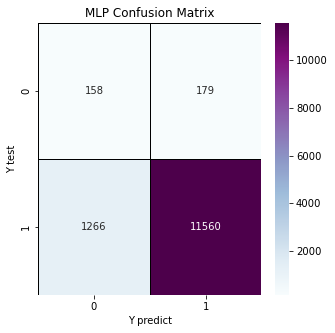

In [448]:
from sklearn.metrics import confusion_matrix,classification_report
mlp_cm = confusion_matrix(y_test, y_pred)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(mlp_cm, annot=True, linewidth=0.7, linecolor='black', fmt='g', ax=ax, cmap="BuPu")
plt.title('MLP Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

## Hidden Markov Model

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from hmmlearn import hmm
import seaborn as sns

C:\Users\jorda\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
#leemos el dataset
df=pd.read_csv('dynamic_api_call_sequence_per_malware_100_0_306.csv')

In [4]:
#visualización de los 10 primeros datos
df.head(10)

,hash,t_0,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,...,t_91,t_92,t_93,t_94,t_95,t_96,t_97,t_98,t_99,malware
0,071e8c3f8922e186e57548cd4c703a5d,112,274,158,215,274,158,215,298,76,...,71,297,135,171,215,35,208,56,71,1
1,33f8e6d08a6aae939f25a8e0d63dd523,82,208,187,208,172,117,172,117,172,...,81,240,117,71,297,135,171,215,35,1
2,b68abd064e975e1c6d5f25e748663076,16,110,240,117,240,117,240,117,240,...,65,112,123,65,112,123,65,113,112,1
3,72049be7bd30ea61297ea624ae198067,82,208,187,208,172,117,172,117,172,...,208,302,208,302,187,208,302,228,302,1
4,c9b3700a77facf29172f32df6bc77f48,82,240,117,240,117,240,117,240,117,...,209,260,40,209,260,141,260,141,260,1
5,cc6217be863e606e49da90fee2252f52,117,208,117,208,117,240,117,240,117,...,141,65,260,141,65,9,117,260,65,1
6,f7a1a3c38809d807b3f5f4cc00b1e9b7,215,274,158,215,274,158,215,172,117,...,117,240,117,172,60,81,60,81,225,1
7,164b56522eb24164184460f8523ed7e2,82,240,117,240,117,240,117,240,117,...,35,172,117,275,240,80,60,215,35,1
8,56ae1459ba61a14eb119982d6ec793d7,82,240,117,240,117,240,117,240,117,...,117,16,31,215,108,208,80,240,117,1
9,c4148ca91c5246a8707a1ac1fd1e2e36,82,208,187,208,172,117,172,208,16,...,117,172,117,208,172,117,100,215,35,1


In [5]:
#desplegar la descripción del dataset
df.describe()

,t_0,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,t_9,...,t_91,t_92,t_93,t_94,t_95,t_96,t_97,t_98,t_99,malware
count,43876.000000,43876.000000,43876.000000,43876.000000,43876.000000,43876.000000,43876.000000,43876.000000,43876.000000,43876.000000,...,43876.000000,43876.000000,43876.000000,43876.000000,43876.000000,43876.000000,43876.000000,43876.000000,43876.000000,43876.000000
mean,142.830226,211.477414,148.217294,189.045674,187.514746,174.190218,170.290022,199.070015,142.659016,167.358921,...,154.448332,173.219459,159.951568,164.615074,173.637159,152.397848,158.442543,160.717203,155.788199,0.975408
std,75.599441,60.082481,47.667868,68.119087,71.196556,65.713664,55.469501,65.474790,66.756934,53.440972,...,78.342789,82.696235,74.248027,70.240283,70.632812,79.819427,78.142193,74.979008,79.068212,0.154880
min,2.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,82.000000,172.000000,117.000000,117.000000,117.000000,117.000000,117.000000,159.000000,117.000000,117.000000,...,81.000000,117.000000,114.000000,117.000000,117.000000,89.000000,100.000000,108.000000,75.250000,1.000000
50%,82.000000,240.000000,158.000000,215.000000,172.000000,158.000000,172.000000,215.000000,117.000000,172.000000,...,141.000000,172.000000,141.000000,171.000000,172.000000,141.000000,171.000000,158.000000,141.000000,1.000000
75%,215.000000,240.000000,172.000000,240.000000,274.000000,240.000000,215.000000,240.000000,208.000000,208.000000,...,240.000000,260.000000,240.000000,215.000000,240.000000,215.000000,224.000000,226.000000,225.000000,1.000000
max,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,...,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,1.000000


In [449]:
'''Se definen las variables objetivo y de entrada, en donde la variable de entrada posee las 100 columnas,
a excepción del hash debido a que es de tipo unico'''
# Variable objetivo
VariableObjetivo=['malware']
#variables de entrada
VariablesEntrada=['t_0', 't_1', 't_2', 't_3','t_4', 't_5', 't_6', 't_7', 't_8','t_9', 't_10', 't_11', 't_12', 't_13',
                  't_14', 't_15', 't_16', 't_17', 't_18','t_19', 't_20', 't_21', 't_22', 't_23','t_24', 't_25', 't_26', 't_27',
                  't_28','t_29', 't_30', 't_31', 't_32', 't_33','t_34', 't_35', 't_36', 't_37', 't_38','t_39', 't_40', 't_41',
                  't_42', 't_43','t_44', 't_45', 't_46', 't_47', 't_48','t_49', 't_50', 't_51', 't_52', 't_53','t_54', 't_55',
                  't_56', 't_57', 't_58','t_59', 't_60', 't_61', 't_62', 't_63','t_64', 't_65', 't_66', 't_67', 't_68','t_69',
                  't_70', 't_71', 't_72', 't_73','t_74', 't_75', 't_76', 't_77', 't_78','t_79', 't_80', 't_81', 't_82', 't_83',
                  't_84', 't_85', 't_86', 't_87', 't_88','t_89', 't_90', 't_91', 't_92', 't_93','t_94', 't_95', 't_96', 't_97',
                  't_98','t_99']

In [450]:
'''Se define los valores de las variables de entrada y objetivo'''
#Se obtiene los valores de entreda y se lo define como X
X=df[VariablesEntrada].values
#Se obtiene los valores de objetivo y se lo define como Y
y=df[VariableObjetivo].values

In [451]:
#importa libreía StandardScaler
from sklearn.preprocessing import StandardScaler
#se define la variable de entrada con StandardScaler
VariablesEntradaScaler=StandardScaler()

In [452]:
#se adapta las variables de entrada
VariablesEntradaFit=VariablesEntradaScaler.fit(X)
#Tranforma los datos adaptados de la variable de entrada
X=VariablesEntradaFit.transform(X)

In [453]:

# crear el modelo de Hidden Markov Model
model = hmm.GaussianHMM(n_components = 2, covariance_type = "diag", n_iter = 50, random_state = 42)

model.fit(X_train)
y_pred=model.predict(X_test)
y_pred

array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

In [454]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7556787966269087

In [455]:
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión de la predicción del analisis del malware:')
print(matriz)

Matriz de Confusión de la predicción del analisis del malware:
[[ 103  234]
 [2982 9844]]


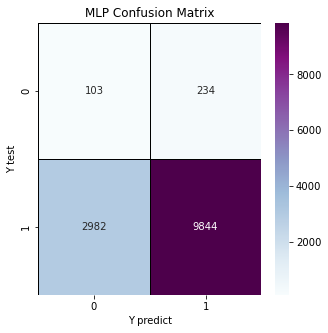

In [456]:
from sklearn.metrics import confusion_matrix,classification_report
mlp_cm = confusion_matrix(y_test, y_pred)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(mlp_cm, annot=True, linewidth=0.7, linecolor='black', fmt='g', ax=ax, cmap="BuPu")
plt.title('MLP Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [457]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print('Precisión del modelo del analisis del malware:')
print(precision)

Precisión del modelo del analisis del malware:
0.976781107362572


## Lógica Difusa o Fuzzy Logic

Es la lógica que utiliza expresiones que no son ni completamente ciertas ni falsas.La Fuzzy Logic se aplica a conceptos que pueden adquirir un valor cualquiera de veracidad dentro de un conjunto de valores que oscilan entre dos extremos:

*La verdad absoluta<br>
*La falsedad total

In [30]:
#Se importa la libreria 
from fcmeans import FCM
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
#Código para cargar el Dataset
df=pd.read_csv('dynamic_api_call_sequence_per_malware_100_0_306.csv')
#visualización de los 10 primeros datos
df.head(10)

,hash,t_0,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,...,t_91,t_92,t_93,t_94,t_95,t_96,t_97,t_98,t_99,malware
0,071e8c3f8922e186e57548cd4c703a5d,112,274,158,215,274,158,215,298,76,...,71,297,135,171,215,35,208,56,71,1
1,33f8e6d08a6aae939f25a8e0d63dd523,82,208,187,208,172,117,172,117,172,...,81,240,117,71,297,135,171,215,35,1
2,b68abd064e975e1c6d5f25e748663076,16,110,240,117,240,117,240,117,240,...,65,112,123,65,112,123,65,113,112,1
3,72049be7bd30ea61297ea624ae198067,82,208,187,208,172,117,172,117,172,...,208,302,208,302,187,208,302,228,302,1
4,c9b3700a77facf29172f32df6bc77f48,82,240,117,240,117,240,117,240,117,...,209,260,40,209,260,141,260,141,260,1
5,cc6217be863e606e49da90fee2252f52,117,208,117,208,117,240,117,240,117,...,141,65,260,141,65,9,117,260,65,1
6,f7a1a3c38809d807b3f5f4cc00b1e9b7,215,274,158,215,274,158,215,172,117,...,117,240,117,172,60,81,60,81,225,1
7,164b56522eb24164184460f8523ed7e2,82,240,117,240,117,240,117,240,117,...,35,172,117,275,240,80,60,215,35,1
8,56ae1459ba61a14eb119982d6ec793d7,82,240,117,240,117,240,117,240,117,...,117,16,31,215,108,208,80,240,117,1
9,c4148ca91c5246a8707a1ac1fd1e2e36,82,208,187,208,172,117,172,208,16,...,117,172,117,208,172,117,100,215,35,1


In [458]:
#Transforacion de las caracteristicas
#Variable ojetiva y variable de entrada
y = df[['malware']]

#Separar las caracteristicas
X = df[['t_0', 't_1', 't_2', 't_3','t_4', 't_5', 't_6', 't_7', 't_8','t_9', 't_10', 't_11', 't_12', 't_13',
                  't_14', 't_15', 't_16', 't_17', 't_18','t_19', 't_20', 't_21', 't_22', 't_23','t_24', 't_25', 't_26', 't_27',
                  't_28','t_29', 't_30', 't_31', 't_32', 't_33','t_34', 't_35', 't_36', 't_37', 't_38','t_39', 't_40', 't_41',
                  't_42', 't_43','t_44', 't_45', 't_46', 't_47', 't_48','t_49', 't_50', 't_51', 't_52', 't_53','t_54', 't_55',
                  't_56', 't_57', 't_58','t_59', 't_60', 't_61', 't_62', 't_63','t_64', 't_65', 't_66', 't_67', 't_68','t_69',
                  't_70', 't_71', 't_72', 't_73','t_74', 't_75', 't_76', 't_77', 't_78','t_79', 't_80', 't_81', 't_82', 't_83',
                  't_84', 't_85', 't_86', 't_87', 't_88','t_89', 't_90', 't_91', 't_92', 't_93','t_94', 't_95', 't_96', 't_97',
                  't_98','t_99']]

### Estandarización de la data

In [459]:
#Se importa el metodo de scalado standar
from sklearn.preprocessing import StandardScaler
#Formar objeto de scala para entradas
VariablesEntradasScaler=StandardScaler()

In [460]:
#Almacenamiento del objeto de ajuste para referencia 

#Datos de entrada
VariablesEntradaFit=VariablesEntradasScaler.fit(X)

In [461]:
#Generación de los valores estandarizadios de x e y
#Datos de entrada

X=VariablesEntradaFit.transform(X)

In [462]:
#Se añade el modelo Fuzzy probabilistico
modelo_fuzzy = FCM(n_clusters=2, init=1.7, rndom_state=0, fuzzifier=2)
modelo_fuzzy.fit(X)

In [463]:
#Se obtiene los centroies
centers = modelo_fuzzy.centers
y_pred_fuzzy = modelo_fuzzy.predict(X)
y_pred_fuzzy

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

## Evaluación

In [464]:
#Se obtiene el accurrcy del modelo fuzzy
from sklearn.metrics import accuracy_score
acc_score_fuzzy = accuracy_score(y, y_pred_fuzzy)
#Se imprime el accuracy
print(acc_score_fuzzy)

0.46980125809098366


In [465]:
#Matriz de confusion
from sklearn.metrics import confusion_matrix,classification_report
cm_fuzzy = confusion_matrix(y, y_pred_fuzzy)
print (cm_fuzzy)

[[  380   699]
 [22564 20233]]


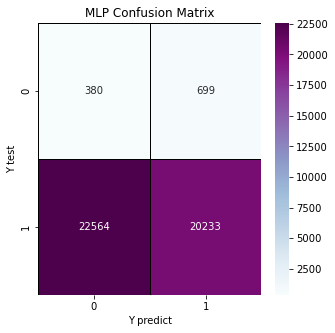

In [466]:
mlp_cm = confusion_matrix(y, y_pred_fuzzy)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(mlp_cm, annot=True, linewidth=0.7, linecolor='black', fmt='g', ax=ax, cmap="BuPu")
plt.title('MLP Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [467]:
from sklearn.metrics import precision_score
precision = precision_score(y, y_pred_fuzzy)
print('Precisión del modelo del analisis del malware:')
print(precision)

Precisión del modelo del analisis del malware:
0.9666061532581693
